In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
train = pd.read_csv('Data/Bike_Sharing_Demand/train.csv')

print(train.shape)
train.sample()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6726,2012-03-17 13:00:00,1,0,0,1,24.6,30.305,60,7.0015,286,400,686


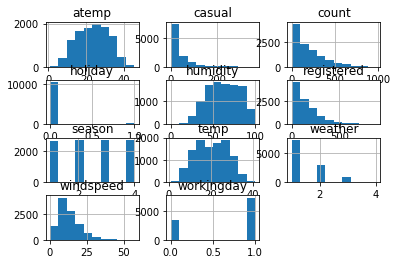

In [27]:
train.hist()
plt.show()

# windspeed

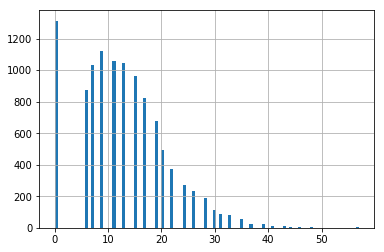

In [28]:
train['windspeed'].hist(bins=100)

0 으로 들어간 데이터가 진짜 0인지, Null 인지

In [29]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


0인 데이터는 앞 뒤 시간의 평균을 넣어준다

In [31]:
train['windspeed_v1'] = train['windspeed']

# fill_value = 0: NaN 값을 0 으로 채워준다
train.loc[train['windspeed'] == 0, 'windspeed_v1'] = (train['windspeed'].shift(1, fill_value=0) + train['windspeed'].shift(-1, fill_value=0))/2
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed_v1
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0.00000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0.00000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0.00000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0.00000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,3.00160
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,6.00320
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,3.00160
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,0.00000
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,0.00000
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,8.49895


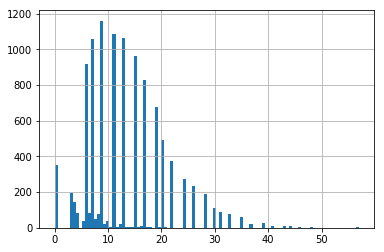

In [35]:
train['windspeed_v1'].hist(bins=100)

해당 날짜 풍속의 평균으로 0 을 채우기

In [36]:
train['date'] = train['datetime'].apply(lambda x: x[:10])
train.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed_v1,date
7746,2012-06-03 03:00:00,2,0,0,1,21.32,25.0,63,7.0015,16,34,50,7.0015,2012-06-03


In [45]:
train['windspeed_v2'] = train['windspeed']
train['windspeed_v2'] = train['windspeed_v2'].replace(0, np.nan)

train['windspeed_v2'] = train.groupby('date')['windspeed_v2'].transform(lambda x: x.fillna(x.mean()))
train[['date', 'windspeed', 'windspeed_v1', 'windspeed_v2']]

,date,windspeed,windspeed_v1,windspeed_v2
0,2011-01-01,0.0000,0.00000,17.199793
1,2011-01-01,0.0000,0.00000,17.199793
2,2011-01-01,0.0000,0.00000,17.199793
3,2011-01-01,0.0000,0.00000,17.199793
4,2011-01-01,0.0000,3.00160,17.199793
5,2011-01-01,6.0032,6.00320,6.003200
6,2011-01-01,0.0000,3.00160,17.199793
7,2011-01-01,0.0000,0.00000,17.199793
8,2011-01-01,0.0000,0.00000,17.199793
9,2011-01-01,0.0000,8.49895,17.199793


pandas 에서는 웬만하면 for 문 쓰지말고 loc, iloc 함수 쓴다

In [24]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed(clean)
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.157941
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.006940
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.016574
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.003202
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,-0.006606
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,-0.045445
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.344039
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.966313
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.106161
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.099460


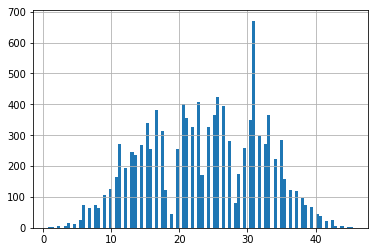

In [12]:
train.atemp.hist(bins=100)

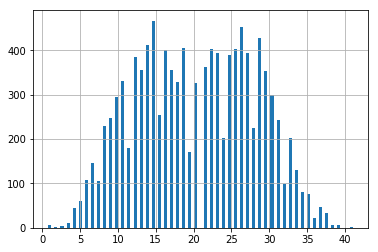

In [13]:
train.temp.hist(bins=100)